# LLM 활용을 위한 환경 세팅

해당 notebook 파일은 LLM 활용을 위한 API 키 사용 여부 확인, LangChain 등 패키지 설치 가상 환경을 확인하는 파일입니다.


테디노트의 https://github.com/teddylee777/langchain-kr.git 활용을 위해 유튜브 영상 및 실습 코드를 참고했습니다.

## 0. API KEY 확인

In [7]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

Python-dotenv could not parse statement starting at line 2
Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 8
Python-dotenv could not parse statement starting at line 9
Python-dotenv could not parse statement starting at line 10
Python-dotenv could not parse statement starting at line 11
Python-dotenv could not parse statement starting at line 12
Python-dotenv could not parse statement starting at line 13
Python-dotenv could not parse statement starting at line 14
Python-dotenv could not parse statement starting at line 15
Python-dotenv could not parse statement starting at line 16


True

In [6]:
# import os

# print(f"[API KEY]\n{os.environ['OPENAI_API_KEY'][:-50]}" + "*" * 50)

## 1. LangChain 관련 패키지 설치 확인

In [3]:
from importlib.metadata import version

print("[LangChain 관련 패키지 버전]")
for package_name in [
    "langchain",
    "langchain-core",
    "langchain-experimental",
    "langchain-community",
    "langchain-openai",
    "langchain-teddynote",
    "langchain-huggingface",
    "langchain-google-genai",
    "langchain-anthropic",
    "langchain-cohere",
    "langchain-chroma",
    "langchain-elasticsearch",
    "langchain-upstage",
    "langchain-cohere",
    "langchain-milvus",
    "langchain-text-splitters",
]:
    try:
        package_version = version(package_name)
        print(f"{package_name}: {package_version}")
    except ImportError:
        print(f"{package_name}: 설치되지 않음")

[LangChain 관련 패키지 버전]
langchain: 0.3.4
langchain-core: 0.3.12
langchain-experimental: 0.3.2
langchain-community: 0.3.3
langchain-openai: 0.2.3
langchain-teddynote: 0.3.10
langchain-huggingface: 0.1.0
langchain-google-genai: 2.0.1
langchain-anthropic: 0.2.3
langchain-cohere: 0.3.1
langchain-chroma: 0.1.4
langchain-elasticsearch: 0.3.0
langchain-upstage: 0.3.0
langchain-cohere: 0.3.1
langchain-milvus: 0.1.6
langchain-text-splitters: 0.3.0


## 2. LangSmith 추적 설정

In [5]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# .env 파일에 LANGCHAIN_API_KEY를 입력합니다.
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("TEST_LangSmith") # set_enable=False 파라미터로 기능 off 가능

LangSmith 추적을 시작합니다.
[프로젝트명]
TEST_LangSmith


## 3. ChatOpenAI 테스트

In [11]:
from langchain_openai import ChatOpenAI

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4o-mini",  # 모델명
)

# 질의내용
question = "SSAFY는 무슨 글자의 약자인가요?"

# 질의
print(f"[답변]: {llm.invoke(question)}")

[답변]: content='SSAFY는 "Samsung Software Academy For Youth"의 약자입니다. 삼성전자가 주관하는 소프트웨어 교육 프로그램으로, 청소년들에게 소프트웨어 개발 및 관련 기술을 교육하여 인재를 양성하는 목적을 가지고 있습니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 53, 'prompt_tokens': 20, 'total_tokens': 73, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_482c22a7bc', 'finish_reason': 'stop', 'logprobs': None} id='run-35d7952f-fe07-452e-b023-a19b34ebf6f9-0' usage_metadata={'input_tokens': 20, 'output_tokens': 53, 'total_tokens': 73, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}}


https://smith.langchain.com 에서 내가 설정한 프로젝트 이름으로 사용이 추적됨을 확인할 수 있음

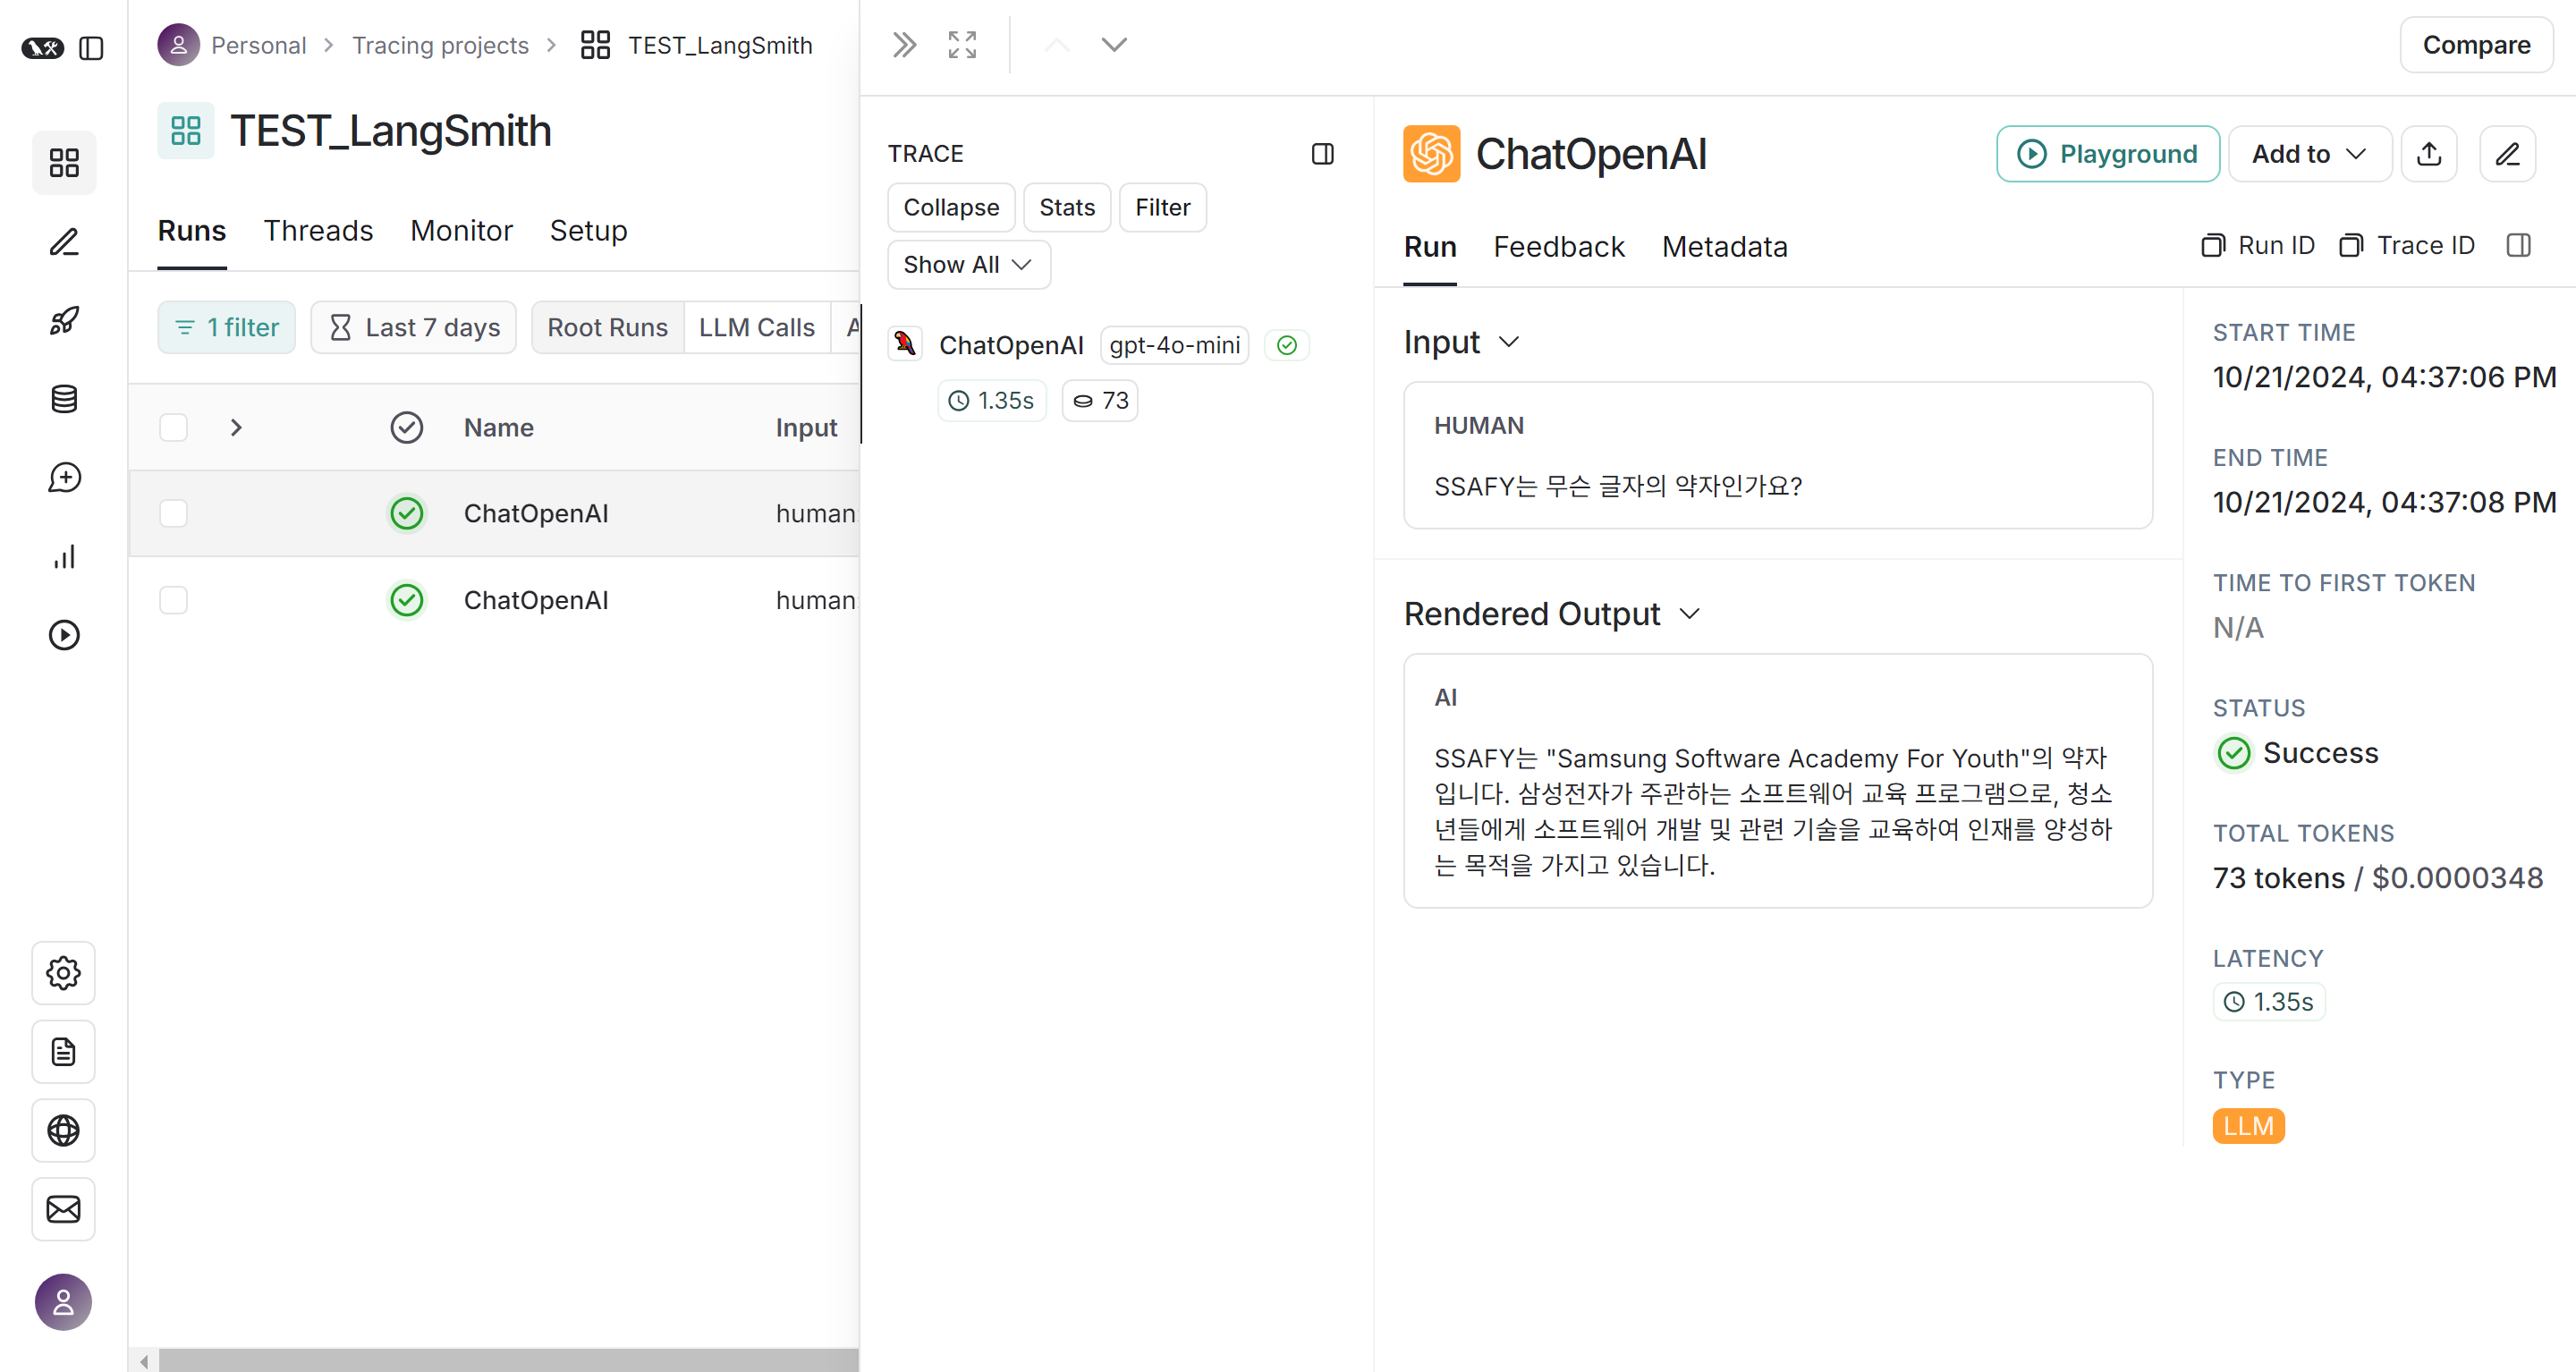

## 4. MultiModal LLM 사용 및 System, User 프롬포트 설정

In [13]:
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4o",  # 모델명
)

# 멀티모달 객체 생성
multimodal_llm = MultiModal(llm)

In [16]:
system_prompt = """당신은 가상화폐 차트를 해석하는 금융 AI 투자 전문가입니다. 
당신의 임무는 주어진 그래프 형식의 데이터를 바탕으로 흥미로운 사실을 정리하여 사용자가 해당 코인을 매수할지, 매도할지, 보류할지를 선택하는 것입니다.

정리된 사실을 바탕으로 사용자가 최대의 수익률을 내기 위한 투자 방법을 선택해야 합니다. 매도, 매수, 보류 중에 한 가지 전략을 선정하고, 그 근거를 설명해야 합니다.
"""

user_prompt = """당신에게 주어진 이미지는 비트코인의 실시간 자산 변동 그래프입니다. 이를 단계별로 확인하고, 향후 투자 전략에 관해 답변하세요."""

# 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)


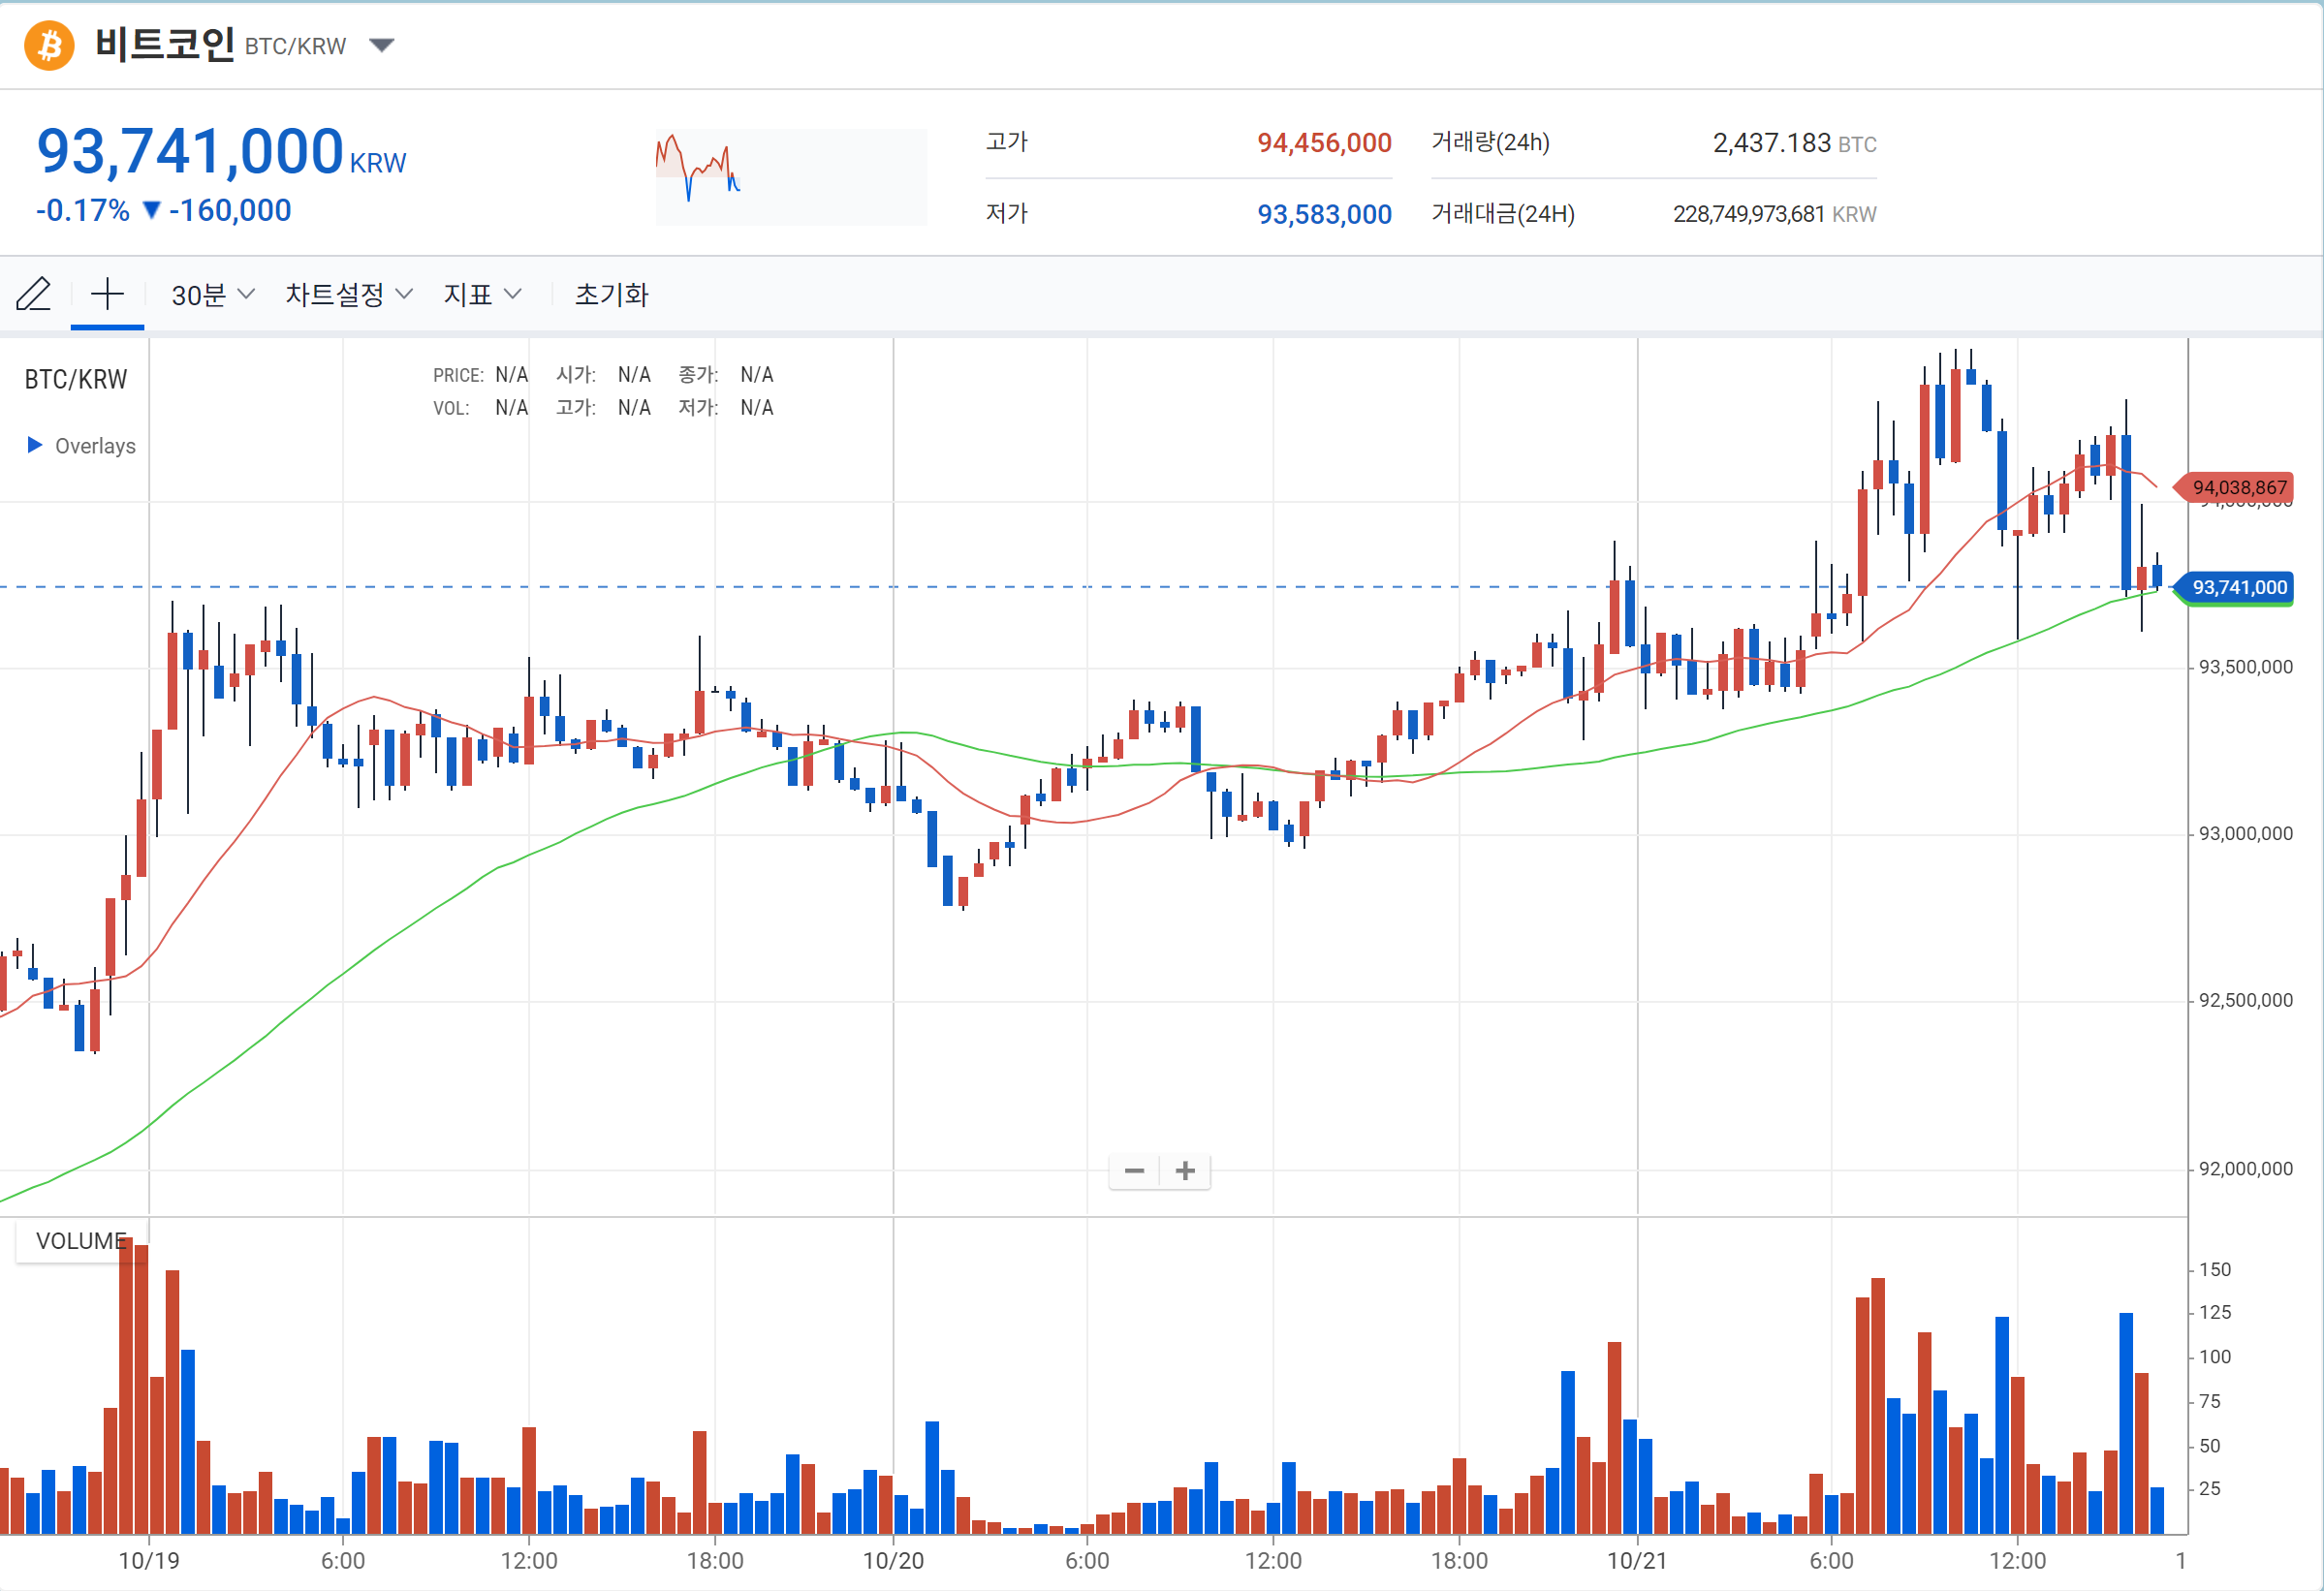

현재 비트코인 가격은 93,741,000원이며, 최근 24시간 동안의 변동폭은 -0.17%입니다. 차트를 분석해보면 다음과 같은 사항을 확인할 수 있습니다:

1. **가격 변동성**: 최근 몇 시간 동안 가격이 상승과 하락을 반복하며 변동성이 높습니다. 이는 시장의 불확실성을 나타낼 수 있습니다.

2. **이동 평균선**: 단기 이동 평균선(빨간색)이 장기 이동 평균선(녹색)을 상향 돌파한 후 가격이 상승세를 보였습니다. 그러나 현재는 다시 하락세로 전환될 가능성이 있습니다.

3. **거래량**: 최근 거래량이 증가하는 추세를 보이고 있습니다. 이는 시장 참여자들이 활발하게 거래하고 있음을 나타냅니다.

### 투자 전략

**보류**를 추천합니다.

- **근거**: 현재 시장은 변동성이 크고, 명확한 방향성을 보이지 않고 있습니다. 이동 평균선의 교차와 거래량 증가가 긍정적 신호일 수 있지만, 가격이 다시 하락할 가능성도 존재합니다. 따라서 추가적인 시장 방향성이 확인될 때까지 관망하는 것이 좋습니다.

In [17]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "./assets/bitcoin_241021_chart.png"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm_with_prompt.stream(IMAGE_PATH_FROM_FILE)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)